In [1]:
## Updated code that only uses the Thieme dataset, but includes both the Col-FN-root1, and Col-FN-shoot1 datasets

thieme_bcf_file_root = "BAM/Col-FN-root-1.raw.bcf"
thieme_bcf_file_shoot = "BAM/Col-FN-shoot-1.raw.bcf"

In [2]:
## Create the thieme snp positions file
import pandas as pd

## SNP list matched as close as possible to the positions in the Thieme supplementary material (N=)
thieme_snp_list = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_og_snp_list.csv")

## Create the thieme snp positions file - separate the SNP column in chrom and pos
thieme_snp_list['chrom'] = thieme_snp_list['SNP'].str.split('_').str[0]
thieme_snp_list['pos'] = thieme_snp_list['SNP'].str.split('_').str[1]

## Save chrom and pos to a new file, with a tab separating them
thieme_snp_list.to_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only.csv", columns=['chrom', 'pos'], sep='\t', index=False, header=False)

In [3]:
## Create the file with the neighbouring positions for each SNP (both sides)

snps = "/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only.csv"

## Create a list of the neighbouring positions for each snp
neighbours = []
with open(snps, "r") as f:
    for line in f:
        line = line.strip().split("\t")
        chrom = line[0]
        position = int(line[1])
        neighbours.append((chrom, position-1))
        neighbours.append((chrom, position+1))

## Save the neighbouring positions to a file
with open("/Users/tomkinsm/reanalysis-mobile-mrna/Data/neighbours.txt", "w") as f:
    for chrom, pos in neighbours:
        f.write(f"{chrom}\t{pos}\n")

In [ ]:
## Create the vcf files 

!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only.csv /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-shoot-1.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_shoot1.vcf
!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/neighbours.txt /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-shoot-1.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_shoot1.vcf

!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only.csv /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-root-1.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_root1.vcf
!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/neighbours.txt /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-root-1.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_root1.vcf

In [81]:
## Repeat the above for the next replicates: Col-FN-root-2 and Col-FN-shoot-2

thieme_bcf_file_root = "BAM/Col-FN-root-2.raw.bcf"
thieme_bcf_file_shoot = "BAM/Col-FN-shoot-2.raw.bcf"

## Create the vcf files

!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only.csv /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-shoot-2.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_shoot2.vcf
!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/neighbours.txt /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-shoot-2.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_shoot2.vcf

!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only.csv /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-root-2.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_root2.vcf
!bcftools view -R /Users/tomkinsm/reanalysis-mobile-mrna/Data/neighbours.txt /Users/tomkinsm/reanalysis-mobile_mrna-data/Col-FN-root-2.raw.bcf -O v -o /Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_root2.vcf


zsh:1: command not found: bcftools
zsh:1: command not found: bcftools
zsh:1: command not found: bcftools
zsh:1: command not found: bcftools


In [2]:
## Functions to create the dataframes from the vcf files
import pandas as pd
import gzip

# Function to extract VCF column names
def get_vcf_names(vcf_path):
    if vcf_path.endswith(".gz"):
        open_func = gzip.open
    else:
        open_func = open

    with open_func(vcf_path, "rt") as ifile:
        for line in ifile:
            if line.startswith("#CHROM"):
                vcf_names = line.strip().split("\t")
                break
    return vcf_names

def create_dataframe(vcf_file):

    # Extract VCF column names
    names = get_vcf_names(vcf_file)

    # Read the VCF file
    chunks = pd.read_csv(
        vcf_file,
        comment="#",  # Ignore metadata lines starting with #
        sep="\t",  # VCF uses tab-delimited fields
        names=names,
        usecols=["#CHROM", "POS", "REF", "ALT", "QUAL", "INFO"],
        chunksize=10000,  # Read in chunks
    )

    # Concatenate chunks into a single DataFrame
    df = pd.concat(chunks)
    return df

In [97]:
## Create the dataframes for the SNPs and neighbours for each of the vcf files
df_snps_shoot1 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_shoot1.vcf")
df_neighbours_shoot1 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_shoot1.vcf")
df_snps_root1 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_root1.vcf")
df_neighbours_root1 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_root1.vcf")

df_snps_shoot2 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_shoot2.vcf")
df_neighbours_shoot2 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_shoot2.vcf")
df_snps_root2 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_snps_only_root2.vcf")
df_neighbours_root2 = create_dataframe("/Users/tomkinsm/reanalysis-mobile-mrna/Data/thieme_neighbours_only_root2.vcf")


In [98]:
## Each SNP position has a reference and an alt. We want to extract the read counts for the ref and the alt, which are found in the AD= section of the INFO column. We will extract these and create a new column for the ref and alt read counts.

import pandas as pd

def extract_read_counts(df):
    # Extract read counts for REF and ALT alleles
    df["REF_COUNT"] = df["INFO"].str.extract(r"AD=([^,]+),")
    df["ALT_COUNT"] = df["INFO"].str.extract(r"AD=[^,]+,([^;]+)")
    ## Check for multiple ALT alleles
    df["ALT_COUNT"] = df["ALT_COUNT"].str.split(",").str[0]
    return df

df_snps_final_shoot1 = extract_read_counts(df_snps_shoot1)
df_snps_final_root1 = extract_read_counts(df_snps_root1)
df_neighbours_final_shoot1 = extract_read_counts(df_neighbours_shoot1)
df_neighbours_final_root1 = extract_read_counts(df_neighbours_root1)

## Calculate n:N
df_snps_final_root1["n:N"] = df_snps_final_root1["ALT_COUNT"].astype(int) / (df_snps_final_root1["REF_COUNT"].astype(int) + df_snps_final_root1["ALT_COUNT"].astype(int))
df_snps_final_shoot1["n:N"] = df_snps_final_shoot1["ALT_COUNT"].astype(int) / (df_snps_final_shoot1["REF_COUNT"].astype(int) + df_snps_final_shoot1["ALT_COUNT"].astype(int))
df_neighbours_final_root1["n:N"] = df_neighbours_final_root1["ALT_COUNT"].astype(int) / (df_neighbours_final_root1["REF_COUNT"].astype(int) + df_neighbours_final_root1["ALT_COUNT"].astype(int))
df_neighbours_final_shoot1["n:N"] = df_neighbours_final_shoot1["ALT_COUNT"].astype(int) / (df_neighbours_final_shoot1["REF_COUNT"].astype(int) + df_neighbours_final_shoot1["ALT_COUNT"].astype(int))

## Repeat for the second replicate
df_snps_final_shoot2 = extract_read_counts(df_snps_shoot2)
df_snps_final_root2 = extract_read_counts(df_snps_root2)

df_neighbours_final_shoot2 = extract_read_counts(df_neighbours_shoot2)
df_neighbours_final_root2 = extract_read_counts(df_neighbours_root2)

## Calculate n:N
df_snps_final_root2["n:N"] = df_snps_final_root2["ALT_COUNT"].astype(int) / (df_snps_final_root2["REF_COUNT"].astype(int) + df_snps_final_root2["ALT_COUNT"].astype(int))
df_snps_final_shoot2["n:N"] = df_snps_final_shoot2["ALT_COUNT"].astype(int) / (df_snps_final_shoot2["REF_COUNT"].astype(int) + df_snps_final_shoot2["ALT_COUNT"].astype(int))
df_neighbours_final_root2["n:N"] = df_neighbours_final_root2["ALT_COUNT"].astype(int) / (df_neighbours_final_root2["REF_COUNT"].astype(int) + df_neighbours_final_root2["ALT_COUNT"].astype(int))
df_neighbours_final_shoot2["n:N"] = df_neighbours_final_shoot2["ALT_COUNT"].astype(int) / (df_neighbours_final_shoot2["REF_COUNT"].astype(int) + df_neighbours_final_shoot2["ALT_COUNT"].astype(int))

In [99]:
## Calculate the error rates from the neighbouring positions
print(df_neighbours_final_root1["ALT_COUNT"].astype(int).sum() / (df_neighbours_final_root1["REF_COUNT"].astype(int).sum() + df_neighbours_final_root1["ALT_COUNT"].astype(int).sum()))
print(df_neighbours_final_shoot1["ALT_COUNT"].astype(int).sum() / (df_neighbours_final_shoot1["REF_COUNT"].astype(int).sum() + df_neighbours_final_shoot1["ALT_COUNT"].astype(int).sum()))
print(df_neighbours_final_root2["ALT_COUNT"].astype(int).sum() / (df_neighbours_final_root2["REF_COUNT"].astype(int).sum() + df_neighbours_final_root2["ALT_COUNT"].astype(int).sum()))
print(df_neighbours_final_shoot2["ALT_COUNT"].astype(int).sum() / (df_neighbours_final_shoot2["REF_COUNT"].astype(int).sum() + df_neighbours_final_shoot2["ALT_COUNT"].astype(int).sum()))

0.0008024616511777853
0.0008797225411754974
0.0008490416217128975
0.0008164776790705462


In [86]:
## Remove values with 0 REF_COUNT
#df_snps_final_root1 = df_snps_final_root1[df_snps_final_root1["REF_COUNT"] != "0"]
#df_snps_final_shoot1 = df_snps_final_shoot1[df_snps_final_shoot1["REF_COUNT"] != "0"]
#df_neighbours_final_root1 = df_neighbours_final_root1[df_neighbours_final_root1["REF_COUNT"] != "0"]
#df_neighbours_final_shoot1 = df_neighbours_final_shoot1[df_neighbours_final_shoot1["REF_COUNT"] != "0"]


df_neighbours_final_root1["n:N"].to_csv("../Data/colfnroot1_neighbours.csv", header=False, index=False)
df_neighbours_final_shoot1["n:N"].to_csv("../Data/colfnshoot1_neighbours.csv", header=False, index=False)

df_snps_final_root1["n:N"].to_csv("../Data/colfnroot1_snps.csv", header=False, index=False)
df_snps_final_shoot1["n:N"].to_csv("../Data/colfnshoot1_snps.csv", header=False, index=False)

df_neighbours_final_root2["n:N"].to_csv("../Data/colfnroot2_neighbours.csv", header=False, index=False)
df_neighbours_final_shoot2["n:N"].to_csv("../Data/colfnshoot2_neighbours.csv", header=False, index=False)

df_snps_final_root2["n:N"].to_csv("../Data/colfnroot2_snps.csv", header=False, index=False)
df_snps_final_shoot2["n:N"].to_csv("../Data/colfnshoot2_snps.csv", header=False, index=False)

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to round the data to the nearest bin center
def rounded(x, bin_width):
    return bin_width * (np.floor(x/bin_width) + 0.5)

def plot_hists(df, exp, plot_colour, data_type):
    ## Set plot font size
    plt.rcParams.update({'font.size': 14})
    data = df.copy()
    if data_type == "snps":
        x_label = "n/N"
    else:
        x_label = "m/M"

    # Define the bin width
    bin_width = 0.01

    # Apply the rounding function to the data
    data["n:N"] = data["n:N"].apply(lambda x: rounded(x, bin_width))

    # Plot the histogram
    plt.figure(figsize=(6, 6))
    plt.hist(data["n:N"], bins=np.arange(0, 1 + bin_width, bin_width), weights=np.ones(len(data)) / len(data), color=plot_colour, alpha=0.5, edgecolor='black', range=(0.01,0.1))

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel("Frequency")
    plt.xlim(0.01, 0.1)
    plt.ylim(0,0.02)
    plt.legend([exp], loc='upper right')

    # Save the plot - making sure the left side of the plot is not cut off
    plt.tight_layout()
    plt.savefig(exp + ".eps", format='eps')

    # Show the plot
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


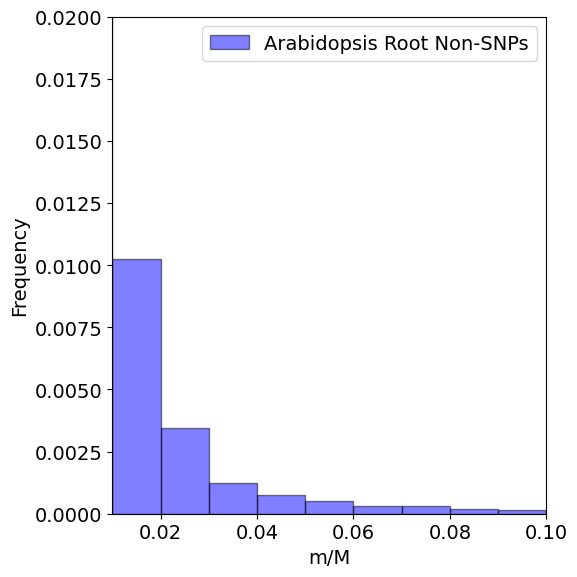

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


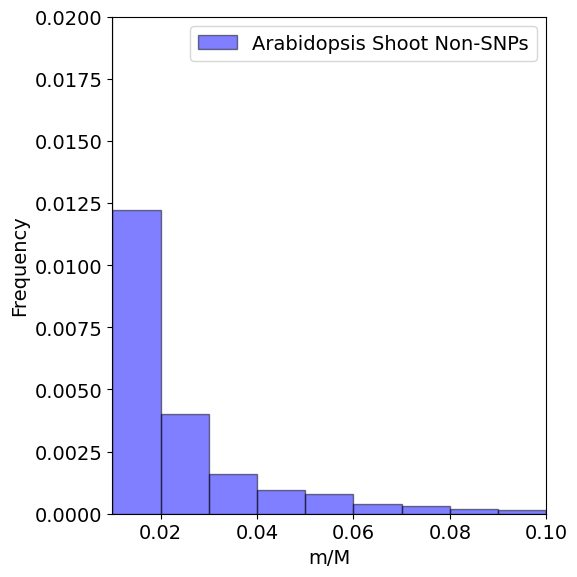

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


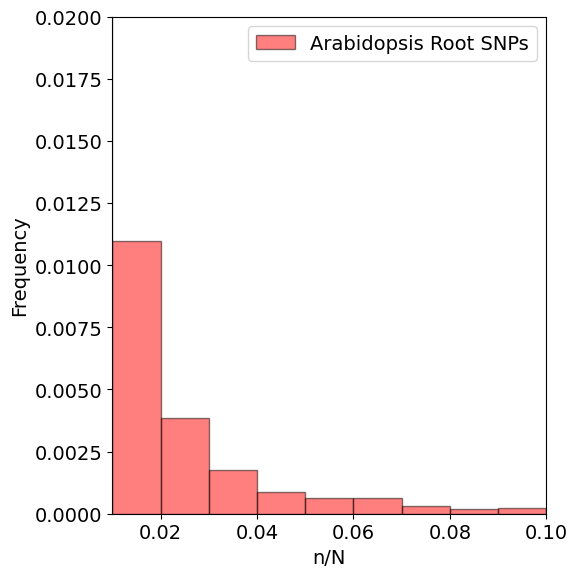

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


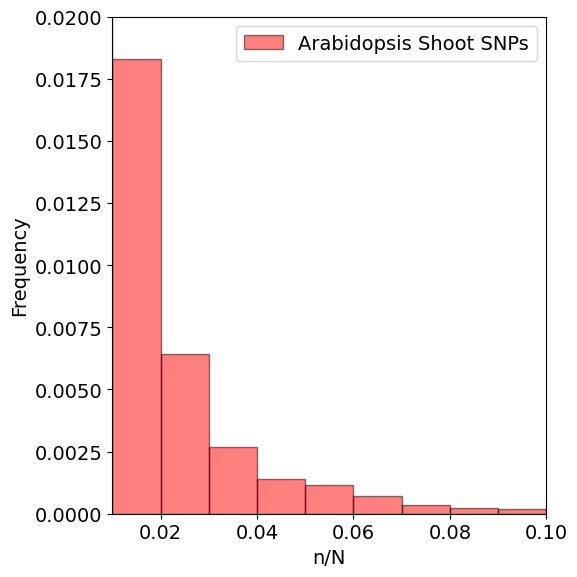

In [88]:
## Load in and plot all four datasets
df_neighbours_final_root1 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnroot1_neighbours.csv", names=["n:N"])
df_neighbours_final_shoot1 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnshoot1_neighbours.csv", names=["n:N"])
df_snps_final_root1 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnroot1_snps.csv", names=["n:N"])
df_snps_final_shoot1 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnshoot1_snps.csv", names=["n:N"])

df_neighbours_final_root2 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnroot2_neighbours.csv", names=["n:N"])
df_neighbours_final_shoot2 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnshoot2_neighbours.csv", names=["n:N"])
df_snps_final_root2 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnroot2_snps.csv", names=["n:N"])
df_snps_final_shoot2 = pd.read_csv("/Users/tomkinsm/reanalysis-mobile-mrna/Data/colfnshoot2_snps.csv", names=["n:N"])

plot_hists(df_neighbours_final_root1, "Arabidopsis Root Non-SNPs","blue","neighbours")
plot_hists(df_neighbours_final_shoot1, "Arabidopsis Shoot Non-SNPs","blue","neighbours")
plot_hists(df_snps_final_root1, "Arabidopsis Root SNPs","red","snps")
plot_hists(df_snps_final_shoot1, "Arabidopsis Shoot SNPs","red","snps")

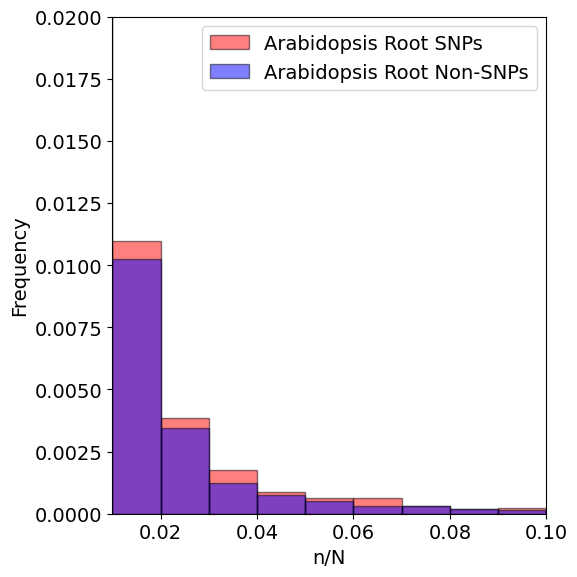

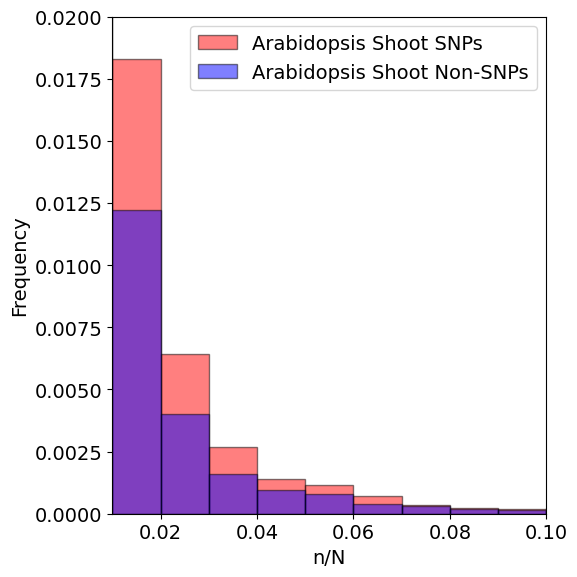

In [ ]:
## Plot the histograms for snps and neighbours on the same axis

def plot_hists_combined(df1, df2, exp1, exp2, plot_colour1, plot_colour2, data_type):
    ## Set plot font size
    plt.rcParams.update({'font.size': 14})
    data1 = df1.copy()
    data2 = df2.copy()
    if data_type == "snps":
        x_label = "n/N"
    else:
        x_label = "m/M"

    # Define the bin width
    bin_width = 0.01

    # Apply the rounding function to the data
    data1["n:N"] = data1["n:N"].apply(lambda x: rounded(x, bin_width))
    data2["n:N"] = data2["n:N"].apply(lambda x: rounded(x, bin_width))

    # Plot the histogram
    plt.figure(figsize=(6, 6))
    plt.hist(data1["n:N"], bins=np.arange(0, 1 + bin_width, bin_width), weights=np.ones(len(data1)) / len(data1), color=plot_colour1, alpha=0.5, edgecolor='black', range=(0.01,0.1))
    plt.hist(data2["n:N"], bins=np.arange(0, 1 + bin_width, bin_width), weights=np.ones(len(data2)) / len(data2), color=plot_colour2, alpha=0.5, edgecolor='black', range=(0.01,0.1))

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel("Frequency")
    plt.xlim(0.01, 0.1)
    plt.ylim(0,0.02)
    plt.legend([exp1, exp2], loc='upper right')

    # Save the plot - making sure the left side of the plot is not cut off
    plt.tight_layout()
    plt.savefig(exp1 + "_" + exp2 + ".png", format='png')

    # Show the plot
    plt.show()

plot_hists_combined(df_snps_final_root1, df_neighbours_final_root1, "Arabidopsis Root SNPs", "Arabidopsis Root Non-SNPs", "red", "blue", "snps")
plot_hists_combined(df_snps_final_shoot1, df_neighbours_final_shoot1, "Arabidopsis Shoot SNPs", "Arabidopsis Shoot Non-SNPs", "red", "blue", "snps")

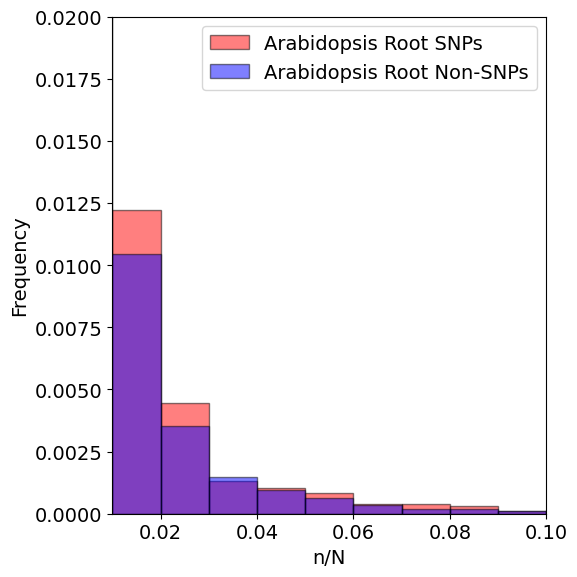

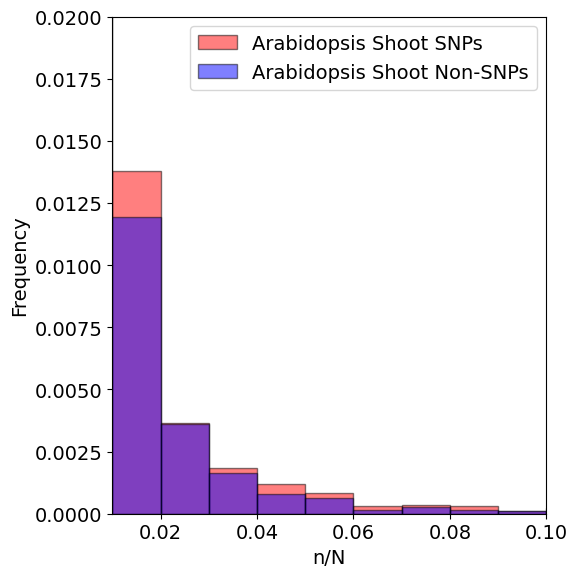

In [93]:
plot_hists_combined(df_snps_final_root2, df_neighbours_final_root2, "Arabidopsis Root SNPs", "Arabidopsis Root Non-SNPs", "red", "blue", "snps")
plot_hists_combined(df_snps_final_shoot2, df_neighbours_final_shoot2, "Arabidopsis Shoot SNPs", "Arabidopsis Shoot Non-SNPs", "red", "blue", "snps")